# Part II - Prosper Loan Data
## by Nahayo Gilbert

## Investigation Overview

> The overall goal was to understand different variables of Prosper loan data and charateristics of loan, and they both include who are the people who request the loans and how are the loans being paid back. And the key insights shows how Prosper rating is associated with providing Prosper loan.

## Dataset Overview

> Prosper is a peer-to-peer lending platform that lets borrowers access personal loans. Borrower qualifications are more accessible than many other online lenders. The data set contains 113,937 loans with 81 variables on each loan.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# Selecting 15 variables of interest
df_prosper_loan = df[['LoanOriginalAmount','LoanStatus','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Term','EmploymentStatus','MonthlyLoanPayment','BorrowerState','DebtToIncomeRatio','ListingCategory (numeric)','ProsperScore']]

## Borrower's Employment Status

The graph shows different categories of people who request prosper loan and the majority of them are full-time employed. 

In [3]:
# Adding Full-time to employed as in most cases they are the same 
df_prosper_loan['EmploymentStatus'] = df_prosper_loan['EmploymentStatus'].replace(['Employed'],'Full-time')
# creating a function for vertical catplots
def gt(df_prosper_loan,xvar):
    g=sb.catplot(data=df_prosper_loan, x=xvar,color = 'blue', kind='count',
           height=8 , alpha=.5, order=df_prosper_loan[xvar].value_counts().index)
    
    g.despine(left=True)
    xvar=xvar.replace("_","")
        
    g.set_axis_labels(f"Distribution of {xvar}",xvar.title())
    plt.title(f'distribution of {xvar}'.title(),weight="bold")
    #Plotting distrubtion of borrowers Employment Status

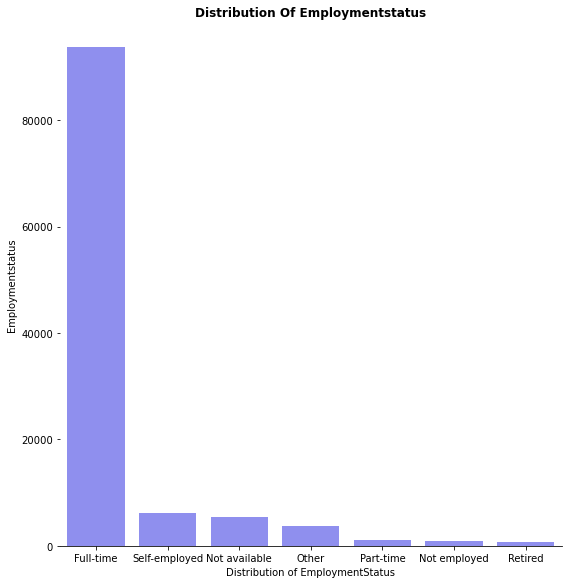

In [4]:
gt(df_prosper_loan,'EmploymentStatus')

## Stated Monthly Income Distribution

Now we will see the average monthly income of people who request the loan which around 5000 and 10000. 

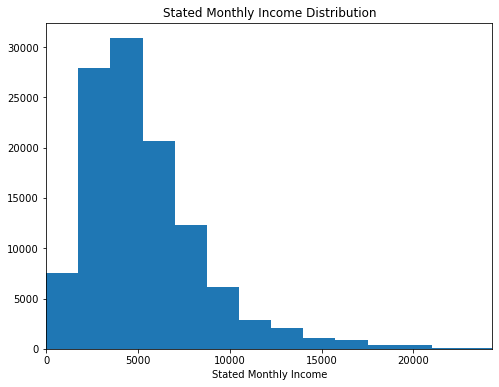

In [5]:
# Applying Amprical rule 3 sd cover 99.7% of the data
income_std = df_prosper_loan['StatedMonthlyIncome'].std()
income_mean = df_prosper_loan['StatedMonthlyIncome'].mean()
boundary = income_std + income_mean * 3 
plt.figure(figsize=[ 8, 6])
plt.hist(data=df_prosper_loan, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);
plt.title('Stated Monthly Income Distribution')
plt.xlabel('Stated Monthly Income');

## Loan status in first 3 states

Let's see how loan is bein paid off in the three states which has high percentage of loans.

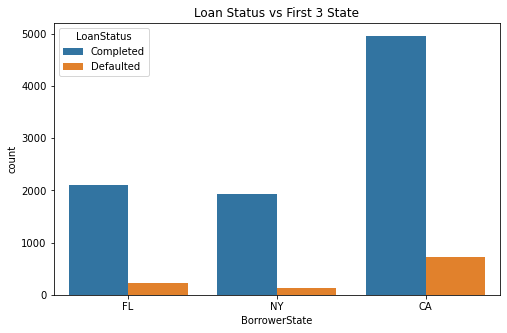

In [6]:
to_show = pd.DataFrame(columns = ["LoanStatus","BorrowerState"])
to_show["LoanStatus"] = df_prosper_loan[(df_prosper_loan['LoanStatus'] == 'Defaulted') | (df_prosper_loan['LoanStatus'] == 'Completed') ]['LoanStatus']
to_show["BorrowerState"]=df_prosper_loan[(df_prosper_loan['BorrowerState'] == 'CA') | (df_prosper_loan['BorrowerState'] == 'FL') | (df_prosper_loan['BorrowerState'] == 'NY') ]['BorrowerState']
plt.figure(figsize = (8,5))
ax2 = sb.countplot(x='BorrowerState',data=to_show,hue="LoanStatus" )
plt.title(f'Loan Status vs First 3 State')
plt.show();

## Summary of key findings

The key insight is that getting a high amount loan at the lowest APR form prosper platform requires a full-time job with monthly income above 5000 and the higher prosper rating the more investors can invest in your loan.